In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [195]:
data=pd.read_csv(r'D:\Assignment\Multi linear\50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [196]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [197]:
pd= data.rename({'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'MDS'},axis=1)
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [198]:
data1= pd.drop('State',axis=1)
data1

,RDS,ADS,MDS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


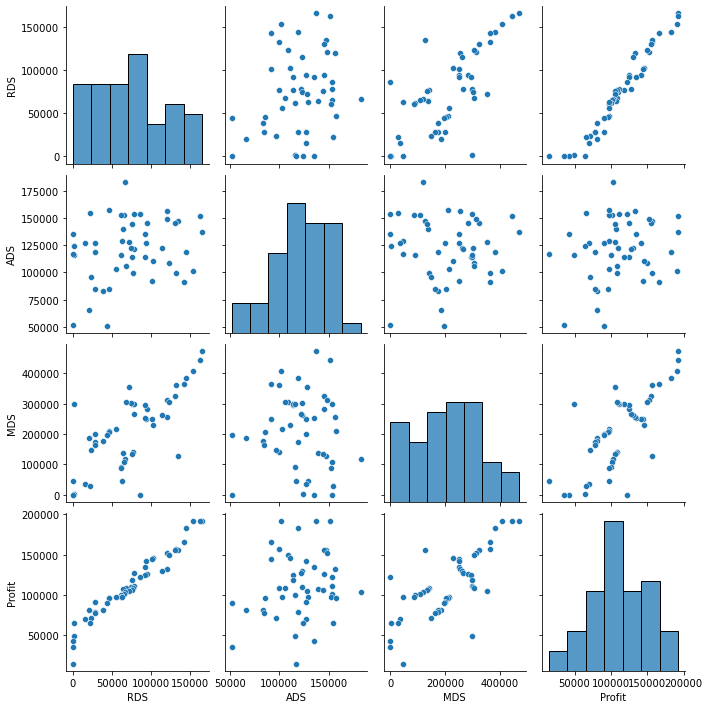

In [199]:
sns.pairplot(data1)


In [200]:
#model building
import statsmodels.formula.api as smf
model= smf.ols('Profit ~ RDS+ADS+MDS',data=pd).fit()
model


In [201]:
model.rsquared,model.rsquared_adj #95% model accuracy

(0.9507459940683246, 0.9475337762901719)

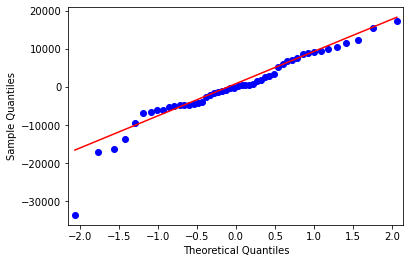

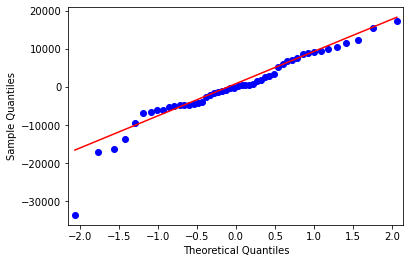

In [202]:
# Test for Normality of Residuals (Q-Q Plot) using residual model 
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

In [203]:
#(checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value


In [204]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
(outlier,_)= model.get_influence().cooks_distance
outlier

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [205]:
np.max(outlier),np.argmax(outlier)

(0.28808229275432634, 49)

In [206]:
#improving the model by dropping outlier
data2= data1.drop(data1.index[49],axis=0,).reset_index(drop=True)
data2

,RDS,ADS,MDS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [207]:
model2=smf.ols("Profit~RDS+ADS+MDS",data=data2).fit()
model2

In [227]:
model2.rsquared
print('thus the model accuracy increased to:',model2.rsquared)

thus the model accuracy increased to: 0.9613162435129847


In [228]:
# Model prediction
import pandas as pd
new_data=pd.DataFrame({'RDS':30000,"ADS":5000,"MDS":70000},index=[0])

In [224]:
pred= model2.predict(new_data)
pred

0    77527.842281
dtype: float64